---
title: "Introduktion til Grafer i Python"
author: "Henrik Sterner"
date: "2025"
---

Grafer er en vigtig datastruktur i mange sammenhænge. De består af knuder, der er forbundet med kanter, og de kan bruges til at repræsentere mange forskellige typer af data, f.eks. sociale netværk, vejnetværk, internetforbindelser, osv.

I følgende afsnit vil vi se på hvordan vi kan repræsentere grafer i Python og hvordan vi kan arbejde med grafer. Vi vil se på hvordan vi kan repræsentere grafer som en matrice (også kaldet adjacency matrix) og hvordan vi kan repræsentere grafer som en adjacency list. Vi vil også se på hvordan vi kan traversere grafer og finde korteste veje i grafer.





## Definition af grafer

En graf $G$ består af en mængde af knuder $V$ og en mængde af kanter $E$. En kant $e$ er en urettet forbindelse mellem to knuder $u$ og $v$. 
Hvis grafen er rettet, er kanterne rettet fra en knude til en anden. En vægtet graf har en vægt associeret med hver kant.

En graf kan repræsenteres på flere forskellige måder. En af de mest almindelige måder er at bruge en adjacency matrix. En adjacency matrix er en $n \times n$ matrix, hvor $n$ er antallet af knuder i grafen. Elementet $A_{ij}$ i matricen er 1 hvis der er en kant mellem knude $i$ og knude $j$, og 0 ellers. Hvis grafen er vægtet, kan elementet $A_{ij}$ indeholde vægten af kanten. Herunder en formulering af en adjacency matrix for en graf, der består af 4 knuder og 3 kanter:

$$ A = \begin{bmatrix}
0 & 1 & 0 & 0 \\
1 & 0 & 1 & 1 \\
0 & 1 & 0 & 0 \\
0 & 1 & 0 & 0
\end{bmatrix} $$

Kolonne $i$ repræsenterer knude $i$, og række $j$ repræsenterer knude $j$. Elementet $A_{ij}$ er 1 hvis der er en kant mellem knude $i$ og knude $j$, og 0 ellers.

Hvis grafen er rettet, vil matricen være asymmetrisk og i såfald vil elementet $A_{ij}$ være 1 hvis der er en kant fra knude $i$ til knude $j$.

Hvis grafen er vægtet, vil elementet $A_{ij}$ indeholde vægten af kanten.

## Repræsentation af grafer i Python

I Python kan vi repræsentere grafer på flere forskellige måder. En af de mest almindelige måder er at bruge en adjacency list. En adjacency list er en dictionary, hvor nøglen er en knude og værdien er en liste af naboknuder. Herunder en formulering af en adjacency list for grafen, der består af 4 knuder og 3 kanter:

```python
graph_al = {
    0: [1],
    1: [0, 2, 3],
    2: [1],
    3: [1]
}
```

Vi kan også repræsentere en adjacency matrix i Python, som reelt bare er en liste af lister. Herunder en formulering af en adjacency matrix for grafen, der består af 4 knuder og 3 kanter:

```python
graph_am = [
    [0, 1, 0, 0],
    [1, 0, 1, 1],
    [0, 1, 0, 0],
    [0, 1, 0, 0]
]
```

## Objektorienteret repræsentation af grafer

En anden måde at repræsentere grafer på i Python er ved at bruge en objektorienteret tilgang. Vi kan definere en klasse `Graph`, der indeholder metoder til at tilføje knuder og kanter, samt metoder til at traversere grafen. Herunder et eksempel på en simpel `Graph` klasse:



In [75]:
# Klasse der repræsenterer en graf
class Graph:
    def __init__(self):
        self.adjacency_list = {}

    def add_node(self, value):
        if value not in self.adjacency_list:
            self.adjacency_list[value] = []

    def add_edge(self, from_node, to_node):
        if from_node in self.adjacency_list and to_node in self.adjacency_list:
            self.adjacency_list[from_node].append(to_node)
            self.adjacency_list[to_node].append(from_node)  # For undirected graph

    def __str__(self):
        return str(self.adjacency_list)

In [76]:
# Test af Graph klassen
g = Graph()
g.add_node(1)
g.add_node(2)
g.add_edge(1, 2)
print(g)  # Output: {1: [2], 2: [1]}


{1: [2], 2: [1]}


Ovenfor er et eksempel på en simpel `Graph` klasse, der bruger en adjacency list til at repræsentere grafen. Klassen har metoder til at tilføje knuder og kanter, samt en metode til at repræsentere grafen som en streng.


### Øvelser
1. Opret en graf med 5 knuder og 6 kanter ved hjælp af både adjacency matrix og adjacency list repræsentationer.
2. Implementer en metode i `Graph` klassen, der returnerer alle naboknuder for en given knude.

## Visualisering af grafer

Lad os prøve at visualisere en graf ved hjælp af biblioteket `networkx` og `matplotlib`. Først skal vi installere de nødvendige biblioteker, hvis de ikke allerede er installeret og derefter kan vi oprette og visualisere en graf:


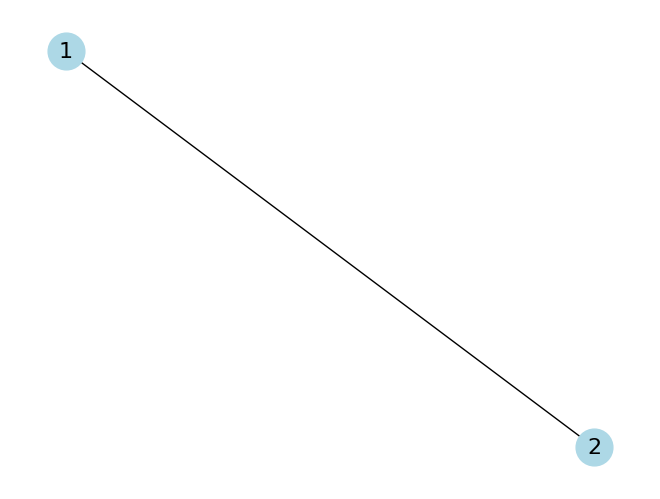

In [77]:
# Visualisere grafen

import matplotlib.pyplot as plt
import networkx as nx
def visualize_graph(graph):
    G = nx.Graph()
    for node, edges in graph.adjacency_list.items():
        for edge in edges:
            G.add_edge(node, edge)
    
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=16, font_color='black')
    plt.show()

visualize_graph(g)

Ovenfor har vi defineret en funktion, visualize_graph, der tager en graf som input og tegner den ved hjælp af matplotlib. Vi bruger NetworkX til at oprette en graf fra adjacency listen og derefter tegner vi den med matplotlib.

Herunder et eksempel på en graf med 5 knuder og 6 kanter, som vi kan visualisere:

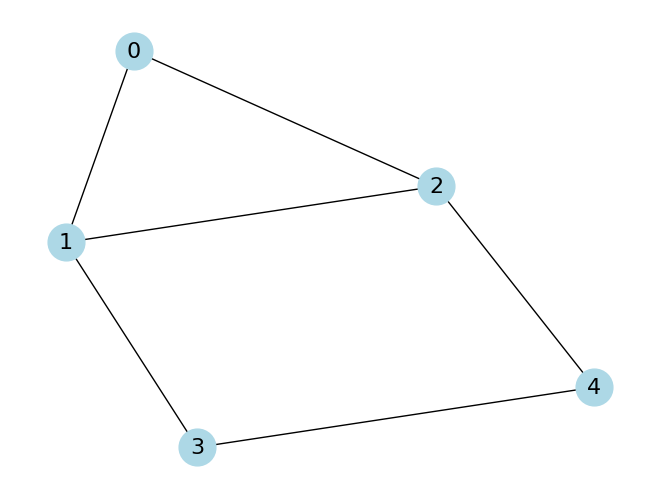

In [78]:
import networkx as nx
import matplotlib.pyplot as plt
# Opret en graf
Gr = Graph()
for i in range(5):
    Gr.add_node(i)
Gr.add_edge(0, 1)
Gr.add_edge(0, 2)
Gr.add_edge(1, 2)
Gr.add_edge(1, 3)
Gr.add_edge(2, 4)
Gr.add_edge(3, 4)

# Visualiser grafen
visualize_graph(Gr)


#### Øvelser
1. Opret en graf med 7 knuder og 10 kanter, og visualiser den ved hjælp af funktionen visualize_graph.
2. Udvid funktionen så den også kan håndtere vægtede kanter og viser vægtene på grafen.
3. Implementer funktionen som en metode i Graph klassen.

## Metoder til graftraversering
Der findes flere forskellige algoritmer til at traversere grafer. Når vi traverserer en graf, besøger vi hver knude og følger kanterne til naboknuderne.

To af de mest almindelige er Depth-First Search (DFS) og Breadth-First Search (BFS). Begge algoritmer kan implementeres rekursivt eller iterativt.

### Dybde Først Søgning (DFS)

DFS udforsker så langt som muligt langs hver gren, før den søger tilbage. I praktisk betyder det, at vi besøger en knude, derefter besøger vi en af dens naboknuder, og fortsætter denne proces, indtil vi når en knude uden ubesøgte naboer. Derefter søger vi tilbage og besøger de næste naboer. Formuleret i pseudokode ser DFS sådan ud:

```
funktion DFS(knude, besøgt):
    markér knude som besøgt
    for hver nabo i knude.naboer:
        hvis nabo ikke er besøgt:
            DFS(nabo, besøgt)
```

Herunder en implementation af DFS i Python:



In [79]:
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    for neighbor in graph.adjacency_list[start]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited)
    return visited

Som det ses ovenfor, bruger vi et sæt til at holde styr på de besøgte knuder for at undgå at besøge den samme knude flere gange. Funktionen starter ved en given knude og besøger alle dens naboer rekursivt.

Sets er uordnede samlinger af unikke elementer, hvilket gør dem perfekte til at holde styr på hvilke knuder der allerede er blevet besøgt under graftraverseringen.

Lad os prøve at bruge DFS på en simpel graf fra tidligere:

In [80]:
dfs_result = dfs(Gr, 0)
print("DFS besøgte knuder:", dfs_result)  # Output: DFS besøg

DFS besøgte knuder: {0, 1, 2, 3, 4}


Ovenfor ses resultatet af DFS på grafen, startende fra knude 0. Outputtet viser de knuder, der blev besøgt under traverseringen.


#### Øvelser
1. Implementer en iterativ version af DFS ved hjælp af en stak. Stak er en LIFO (Last In, First Out) datastruktur, der kan bruges til at holde styr på hvilke knuder der skal besøges næste gang.
2. Test både den rekursive og den iterative version af DFS på en graf med 6 knuder og 7 kanter.


### Bredde Først Søgning (BFS)

BFS udforsker alle naboer på det nuværende niveau, før den går videre til knuder på det næste niveau. Det betyder, at vi først besøger en knude, derefter besøger vi alle dens naboer, og derefter besøger vi naboernes naboer, og så videre. Formuleret i pseudokode ser BFS sådan ud:

```plaintext
funktion BFS(start_knude):
    opret en kø
    tilføj start_knude til kø
    markér start_knude som besøgt
    mens køen ikke er tom:
        knude = fjern første element fra kø
        for hver nabo i knude.naboer:
            hvis nabo ikke er besøgt:
                markér nabo som besøgt
                tilføj nabo til kø
```

Herunder en implementation af BFS i Python:



In [81]:
def bfs(graph, start):
    visited = set()
    queue = [start]
    visited.add(start)

    while queue:
        current = queue.pop(0)
        for neighbor in graph.adjacency_list[current]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
    return visited

Vi kan afprøve BFS på den samme graf som tidligere:


In [82]:
bfs_result = bfs(Gr, 0)
print("BFS besøgte knuder:", bfs_result)  # Output: BFS besøgte knuder: {0, 1, 2, 3, 4}

BFS besøgte knuder: {0, 1, 2, 3, 4}


Vi kan bruge en deque (dobbelt-ended queue) fra collections modulet til at implementere køen, da den tillader effektiv tilføjelse og fjernelse af elementer fra begge ender. En doble-ended queue (deque) er en datastruktur, der tillader tilføjelse og fjernelse af elementer fra begge ender med høj effektivitet. Dette gør den ideel til implementering af køer, hvor vi ofte skal tilføje elementer til slutningen og fjerne elementer fra begyndelsen.

#### Øvelser
1. Implementer en iterativ version af BFS ved hjælp af en liste som kø.
2. Overvej forskellene mellem DFS og BFS i forhold til hukommelsesforbrug og ydeevne på forskellige typer grafer.



## Anvendelser af grafer

Grafer har mange anvendelser i forskellige felter. Nogle eksempler inkluderer:
- Sociale netværk: Grafer kan bruges til at repræsentere relationer mellem mennesker i sociale netværk som Facebook eller LinkedIn.
- Vejnetværk: Grafer kan bruges til at repræsentere vejnetværk og finde korteste ruter mellem to punkter.
- Internetforbindelser: Grafer kan bruges til at repræsentere forbindelser mellem computere på internettet.
- Biologi: Grafer kan bruges til at repræsentere biologiske netværk, såsom protein-interaktionsnetværk eller gen-reguleringsnetværk.
- Anbefalingssystemer: Grafer kan bruges til at repræsentere relationer mellem brugere og produkter i anbefalingssystemer.

I det følgende vil vi udforske nogle af disse anvendelser nærmere og se på hvordan grafer kan bruges til at løse konkrete problemer inden for disse områder.


### Sociale netværk

Grafer kan bruges til at modellere sociale netværk, hvor knuder repræsenterer personer, og kanter repræsenterer relationer mellem dem (f.eks. venskaber eller følgere). Ved at analysere disse grafer kan vi finde indflydelsesrige personer, opdage fællesskaber og forstå informationsspredning samtidig med at vi kan anvende grafalgoritmer til at løse problemer relateret til sociale netværk, såsom at finde korteste forbindelser mellem personer eller identificere grupper af tætte forbindelser inden for netværket.

I det følgende tager vi udgangspunkt i et simpelt fiktivt socialt netværk og anvender grafalgoritmer til at analysere det.

Herunder initialiseres netværket i python:

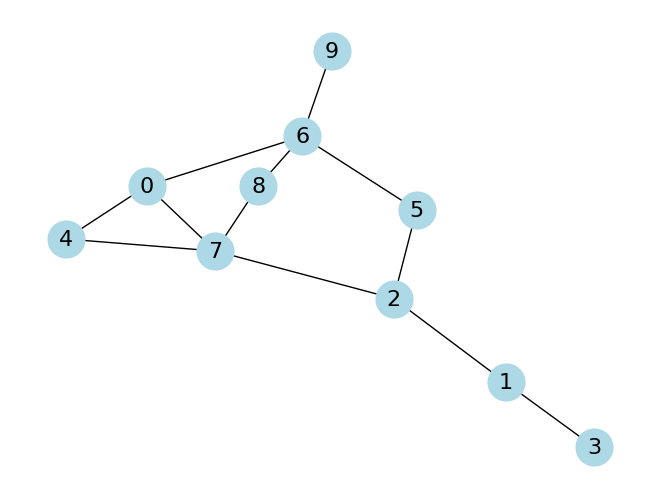

In [83]:
# indlæs sociale netværksdata med 10 bruger og nogle tilfældige relationer mellem dem
import random
social_graph = Graph()
for i in range(10):
    social_graph.add_node(i)
for _ in range(15):
    from_node = random.randint(0, 9)
    to_node = random.randint(0, 9)
    if from_node != to_node:
        social_graph.add_edge(from_node, to_node)
visualize_graph(social_graph)




Ovenfor er et eksempel på et simpelt socialt netværk repræsenteret som en adjacency list i Python. Hver knude repræsenterer en person, og hver liste indeholder de personer, som den pågældende person er forbundet med.

I det følgende sætter vi navne på knuderne ved brug af en dictionary og anvender DFS og BFS til at undersøge hvor mange personer der kan nås fra en given person i netværket.

In [84]:
# tilføj fiktive navne til knuderne
names = {0: "Alice", 1: "Bob", 2: "Charlie", 3: "David", 4: "Eve",
         5: "Frank", 6: "Grace", 7: "Heidi", 8: "Ivan", 9: "Judy"}

# udfør DFS og BFS på det sociale netværk
dfs_social_result = dfs(social_graph, 0)
print("DFS besøgte knuder i socialt netværk:", [names[node] for node in dfs_social_result])

bfs_social_result = bfs(social_graph, 0)
print("BFS besøgte knuder i socialt netværk:", [names[node] for node in bfs_social_result])


DFS besøgte knuder i socialt netværk: ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Heidi', 'Ivan', 'Judy']
BFS besøgte knuder i socialt netværk: ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Heidi', 'Ivan', 'Judy']


Vi kan også visualisere grafen med navne på knuderne for bedre forståelse:


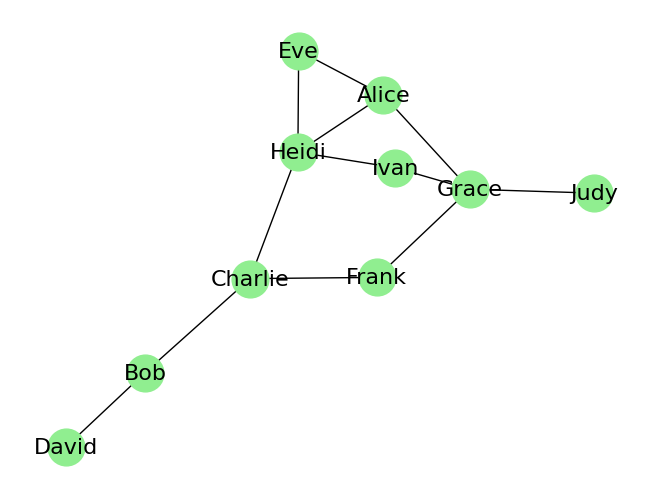

In [85]:
# visualiser det sociale netværk med navne
def visualize_social_graph(graph, names):
    G = nx.Graph()
    for node, edges in graph.adjacency_list.items():
        for edge in edges:
            G.add_edge(names[node], names[edge])
    
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=700, font_size=16, font_color='black')
    plt.show()

visualize_social_graph(social_graph, names)

Vi kan også prøve at finde den korteste vej mellem to personer i netværket. Her kan vi bruge Dijkstra's algoritme, som er velegnet til vægtede grafer. I dette tilfælde antager vi, at alle kanter har en vægt på 1, hvilket gør det til et uvejet grafproblem. Herunder en simpel formulering af Dijkstra's algoritme i pseudokode:

```

funktion Dijkstra(graf, start, mål):
    opret en prioriteret kø
    tilføj start til kø med afstand 0
    opret en dictionary til at holde afstande
    sæt afstand[start] = 0
    mens køen ikke er tom:
        nuværende_knude = fjern knude med laveste afstand fra kø
        hvis nuværende_knude == mål:
            returner afstand[mål]
        for hver nabo i graf[nuværende_knude]:
            ny_afstand = afstand[nuværende_knude] + vægt(nuværende_knude, nabo)
            hvis nabo ikke i afstand eller ny_afstand < afstand[nabo]:
                afstand[nabo] = ny_afstand
                tilføj nabo til kø med afstand ny_afstand
    returner uendelig (hvis mål ikke kan nås)
```

Herunder følger en implementation af Dijkstra's algoritme i Python:


In [86]:
import heapq # heapq bruges til at implementere en prioriteret kø

def dijkstra(graph, start, goal):
    queue = []
    heapq.heappush(queue, (0, start))
    distances = {start: 0}

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        if current_node == goal:
            return distances[goal]

        for neighbor in graph[current_node]:
            distance = current_distance + 1  # Antager vægt på 1 for hver kant
            if neighbor not in distances or distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(queue, (distance, neighbor))

    return float("inf")  # Hvis mål ikke kan nås

# Eksempel på brug af Dijkstra's algoritme
# Vi beregner den korteste vej fra Alice (0) til Frank (5). Resultatet er antallet af kanter i den korteste sti.
dijkstra(social_graph.adjacency_list, 0, 5)


2

Vi gør opmærksom på, at heapq biblioteket bruges til at implementere en prioriteret kø, som er afgørende for effektiviteten af Dijkstra's algoritme. En heapq er en datastruktur, der tillader hurtig adgang til det mindste element, hvilket gør den ideel til brug i Dijkstra's algoritme, hvor vi konstant skal hente den knude med den laveste afstand. 
En heapq er en binær træstruktur, der opretholder heap-egenskaben, hvilket betyder, at for enhver given knude i træet, er værdien af knuden mindre end eller lig med værdierne af dens børn. Dette gør det muligt at effektivt finde og fjerne det mindste element, hvilket er essentielt for Dijkstra's algoritme, da vi hele tiden skal arbejde med den knude, der har den laveste kendte afstand fra startknuden.



#### Øvelser

1. Brug Dijkstra's algoritme til at finde den korteste vej fra Alice til Frank i det givne sociale netværk.
2. Modificer Dijkstra's algoritme til at returnere den faktiske sti (rækkefølgen af knuder) i stedet for kun afstanden.
3. Find den person i netværket, der er tættest forbundet med Alice ved hjælp af Dijkstra's algoritme.
4. Beregn det gennemsnitlige antal forbindelser (gennemsnitlig afstand) mellem alle par af personer i netværket ved hjælp af Dijkstra's algoritme.
5. Find den person med flest forbindelser i netværket (højeste grad) ved at analysere adjacency listen.


### Tognetværk

Grafer kan også bruges til at modellere tognetværk, hvor knuder repræsenterer stationer, og kanter repræsenterer togforbindelser mellem stationerne. Ved at analysere disse grafer kan vi finde de mest effektive ruter, optimere tidsplaner og forbedre forbindelser mellem forskellige dele af netværket.

I det følgende kigger vi på et simpelt tognetværk og anvender grafalgoritmer til at finde korteste ruter mellem stationer.
Vi antager vi ser på et simpelt tognetværk I København med følgende stationer og forbindelser:

| Station       | Forbindelser               |
|---------------|----------------------------|
| København H   | Nørreport, Østerport       |
| Nørreport     | København H, Østerport, Vesterport |
| Østerport     | København H, Nørreport     |
| Vesterport    | Nørreport                  |
| Frederiksberg | Nørreport                  |
| Valby         | Vesterport                 |
| Hvidovre      | Valby                      |
| Rødovre      | Hvidovre                   |
| Glostrup      | Rødovre                    |


Ovenfor er et eksempel på et simpelt tognetværk repræsenteret som en adjacency list i Python. Hver knude repræsenterer en station, og hver liste indeholder de stationer, som den pågældende station er forbundet med:

Lad os oprette grafen i Python hvor vi til hver kant tillægger en vægt svarende til rejsetiden i minutter mellem stationerne:

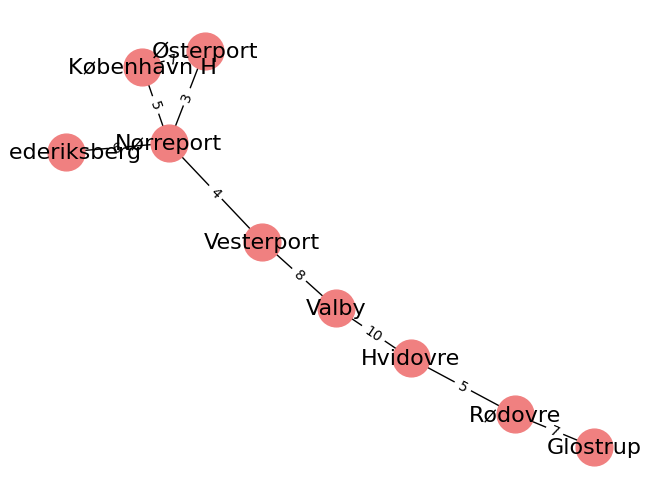

In [87]:
# Opret en graf med stationer som knuder og forbindelser som kanter fra ovenstående tabel med fiktive rejsetider:

stationer = {
    "København H": [("Nørreport", 5), ("Østerport", 7)],
    "Nørreport": [("København H", 5), ("Østerport", 3), ("Vesterport", 4), ("Frederiksberg", 6)],
    "Østerport": [("København H", 7), ("Nørreport", 3)],
    "Vesterport": [("Nørreport", 4), ("Valby", 8)],
    "Frederiksberg": [("Nørreport", 6)],
    "Valby": [("Vesterport", 8), ("Hvidovre", 10)],
    "Hvidovre": [("Valby", 10), ("Rødovre", 5)],
    "Rødovre": [("Hvidovre", 5), ("Glostrup", 7)],
    "Glostrup": [("Rødovre", 7)]
}

# visualisere stationsgrafen
def visualize_graph_with_weights(station_graph):
    G = nx.Graph()
    for node, edges in station_graph.items():
        for edge, weight in edges:
            G.add_edge(node, edge, weight=weight)
    
    pos = nx.spring_layout(G)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_color='lightcoral', node_size=700, font_size=16, font_color='black')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()

visualize_graph_with_weights(stationer)

Ovenfor har vi visualiseret tognetværket ved hjælp af NetworkX og Matplotlib. Hver knude repræsenterer en station, og hver kant repræsenterer en togforbindelse mellem stationerne. Kanterne har også vægte, der repræsenterer rejsetiden i minutter mellem stationerne.

Herunder en implementation af Dijkstra's algoritme i Python til at finde den korteste rejsetid mellem to stationer i tognetværket hvor hver kant er vægtet med rejsetiden i minutter:

In [88]:
import heapq
def dijkstra(graph, start, mål):
    kø = []
    heapq.heappush(kø, (0, start))  # (afstand, knude)
    afstande = {start: 0}
    
    while kø:
        nuværende_afstand, nuværende_knude = heapq.heappop(kø)
        
        if nuværende_knude == mål:
            return nuværende_afstand
        
        for nabo, vægt in graph[nuværende_knude]:
            ny_afstand = nuværende_afstand + vægt
            if nabo not in afstande or ny_afstand < afstande[nabo]:
                afstande[nabo] = ny_afstand
                heapq.heappush(kø, (ny_afstand, nabo))
    return float("inf")  # Hvis mål ikke kan nås

Det kan være en god ide at nærlæse Dijkstra's algoritme og forstå hvordan den fungerer i forhold til vægtede grafer, især i konteksten af et tognetværk, hvor hver kant har en specifik vægt (rejsetid). 
Uformelt kan vi sige, at Dijkstra's algoritme fungerer ved at udforske de korteste kendte afstande fra startknuden til alle andre knuder i grafen. Den starter ved startknuden og opdaterer afstandene til dens naboer baseret på vægtene af kanterne. Derefter vælger den den knude med den laveste kendte afstand og gentager processen, indtil den når målknuden eller har udforsket alle knuder.

Herunder kan vi bruge Dijkstra's algoritme til at finde den korteste rejsetid mellem to stationer i tognetværket:

In [89]:
# Korteste rejsetid fra København H til Glostrup
dijkstra(stationer, "København H", "Glostrup")

39

Vi kan finde rejseplanen for den korteste rejsetid mellem to stationer i tognetværket ved hjælp af Dijkstra's algoritme. Her er et eksempel på, hvordan vi kan finde den korteste rejsetid fra "København H" til "Glostrup":

###

In [90]:
# Rejseplanen for den korteste rejsetid mellem to stationer i tognetværket ved hjælp af Dijkstra's algoritme:
def dijkstra_path(graph, start, mål):
    kø = []
    heapq.heappush(kø, (0, start))  # (afstand, knude)
    afstande = {start: 0}
    forældre = {start: None}
    
    while kø:
        nuværende_afstand, nuværende_knude = heapq.heappop(kø)
        
        if nuværende_knude == mål:
            sti = []
            while nuværende_knude is not None:
                sti.append(nuværende_knude)
                nuværende_knude = forældre[nuværende_knude]
            return sti[::-1]  # Returner den omvendte sti
        
        for nabo, vægt in graph[nuværende_knude]:
            ny_afstand = nuværende_afstand + vægt
            if nabo not in afstande or ny_afstand < afstande[nabo]:
                afstande[nabo] = ny_afstand
                forældre[nabo] = nuværende_knude
                heapq.heappush(kø, (ny_afstand, nabo))
    return []  # Hvis mål ikke kan nås

# Rejseplan fra København H til Glostrup
dijkstra_path(stationer, "København H", "Glostrup")

['København H',
 'Nørreport',
 'Vesterport',
 'Valby',
 'Hvidovre',
 'Rødovre',
 'Glostrup']

Funktionen dijkstra_path fungerer ved at holde styr på den sti, der fører til hver knude, mens den udforsker grafen. Når målknuden nås, kan stien rekonstrueres ved at følge forældrenoderne tilbage til startknuden. Dette giver os ikke kun den korteste afstand men også den præcise rute, der skal følges for at nå målet.

#### Øvelser
1. Afprøv Dijkstra's algoritme til at finde den korteste rejsetid mellem "Nørreport" og "Hvidovre".
2. Modificer Dijkstra's algoritme til at returnere den faktiske rute (rækkefølgen af stationer) i stedet for kun rejsetiden.
3. Overvej hvordan du kan håndtere situationer, hvor visse forbindelser er midlertidigt ude af drift (f.eks. på grund af vedligeholdelse), og hvordan det påvirker korteste rute beregningen.

